Project Name: 
Lending Case Study

Project Description: 

Primary goal of this project is to identify the factors responsible for loan defaults with the help of datasets provided. This will enable the company to refine loan approval processes by implementing stricter criteria for high-risk applicants, potentially leading to loan denials or adjustments and improve risk assessment models by developoing more accurate predictive models to better assess the creditworthiness of applicants.


Method used:

1. Data Exploration and Cleaning: 
    1.1 - Check the missing values
    1.2 - Handle missing values through imputation or data removal
    1.3 - Check for data types and convert if required

2. Exploratory Data Analysis
    2.1 - Target Variable Analysis
    2.2 - Univariate Analysis to check the distributions of numerical and categorical variables.
    2.3 - Bivariate Analysis to establish the relationship between relevant variables and the target variable.
    2.4 - Correlation Analysis to calculate and visualizes the correlation matrix for selected numerical variables.

3. Data Visualization: Utilizes different plots to visualize data distributions and relationships.

4. Data insight and conclusion:

    4.1 - Based on the Exploratory Data Analysis, analyze the variables which are strongly associated with loan defalt
    4.2 - Is there any significant differneces between defaulters and non-defaulters
    4.3 - Key risk factors that company should consider


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
# Load the dataset
df = pd.read_csv('C:/Jagdish/IIIT Main Folder/IIIT Folder for my notes/Lending Case study/loan/loan.csv', low_memory=False) 

In [111]:
#print(df.head(10))

In [190]:
# 1. Data Exploration and Cleaning

# 1.1 Check for missing values
print("Missing values:\n", df.isnull().sum())

In [113]:
#Change the view of the output, required when all the rows and columns are not visible in the output

pd.set_option('display.max_rows', None) 

# Set to display all columns
pd.set_option('display.max_columns', None)

# Set to display full column width
pd.set_option('display.max_colwidth', None)

# Show dimensions
pd.set_option('display.show_dimensions', True)

# Expand frame repr
pd.set_option('display.expand_frame_repr', True)

In [114]:
# Data Cleaning:

# 1.2 
# Handle missing values
# Filling missing values with median
# Data Type should be converted to numerical. 

def clean_emp_length(emp_length):
    if pd.isna(emp_length):
        return np.nan  # Keep as NaN for imputation or create a category
    elif emp_length == 'n/a':
        return np.nan
    elif emp_length == '10+ years':
        return 10
    elif emp_length == '< 1 year':
        return 0
    else:
        return int(emp_length.split()[0])

df['emp_length'] = df['emp_length'].apply(clean_emp_length)
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].median())



In [115]:
#Data Cleaning:
# A missing value in this column often means the borrower has never been delinquent.
# Replace missing values with 999 to indicate "never delinquent"

df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(999)


In [116]:
#Data Cleaning:

#Data Type should be numerical. Convert from percentage/string to float
# Handle missing values with mean

def clean_revol_util(util):
    if pd.isna(util):
        return np.nan
    else:
        return float(util.strip('%')) / 100

df['revol_util'] = df['revol_util'].apply(clean_revol_util)
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].mean())
print(df)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [117]:
#collections_12_mths_ex_med
#Description: Number of collections in the last 12 months (excluding medical).
##Importance: Indicates recent financial difficulties.
# Data Cleaning: Handle missing values with 0, assuming no collections if not reported

# chargeoff_within_12_mths (Charge-offs in 12 Months):
#Description: Number of charge-offs in the last 12 months.
#Importance: A strong indicator of past defaults
#Data Cleaning: Handle missing values with 0

#pub_rec_bankruptcies:
#Description: Number of public record bankruptcies.
#Importance: A very strong indicator of financial distress and higher default risk.
#Data Cleaning: Handle missing values with 0


df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(0)
df['chargeoff_within_12_mths'] = df['chargeoff_within_12_mths'].fillna(0)
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)


In [ ]:
# 2. Handle Missing Values in DTI
#####df['dti'].fillna(df['dti'].median(), inplace=True)

# Calculate the median of the 'dti' column
dti_median = df['dti'].median()
df['dti'].fillna(dti_median)


In [ ]:
#Handle NaN value of Loan_status_numeric

#How: Filling NaN values with a new numerical value that doesn't conflict with our existing categories

df['loan_status_numeric'] = df['loan_status_numeric'].fillna(-1)

#print(df['loan_status_numeric'])

In [118]:
#pub_rec_bankruptcies:
#Data Cleaning: Handle missing values with median

df['annual_inc'].fillna(df['annual_inc'].median(), inplace=True) 


C:\Users\jagdi\AppData\Local\Temp\ipykernel_17868\3655015478.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['annual_inc'].fillna(df['annual_inc'].median(), inplace=True)


In [189]:
# 1.3 Check for data types
#print("\nData types:\n", df.dtypes)


In [ ]:
#convert int_rate from percentage to float for analysis

def Convert_int_rate_to_float(int_rate):
    if pd.isna(int_rate):
        return np.nan
    else:
        return float(int_rate.strip('%')) / 100

df['int_rate'] = df['int_rate'].apply(Convert_int_rate_to_float)

In [121]:
# 2. Exploratory Data Analysis (EDA)

# 2.1 Target Variable Analysis
print("\nLoan Status Distribution:")
print(df['loan_status'].value_counts(normalize=True))



Loan Status Distribution:
loan_status
Fully Paid     0.829620
Charged Off    0.141677
Current        0.028703
Name: proportion, Length: 3, dtype: float64


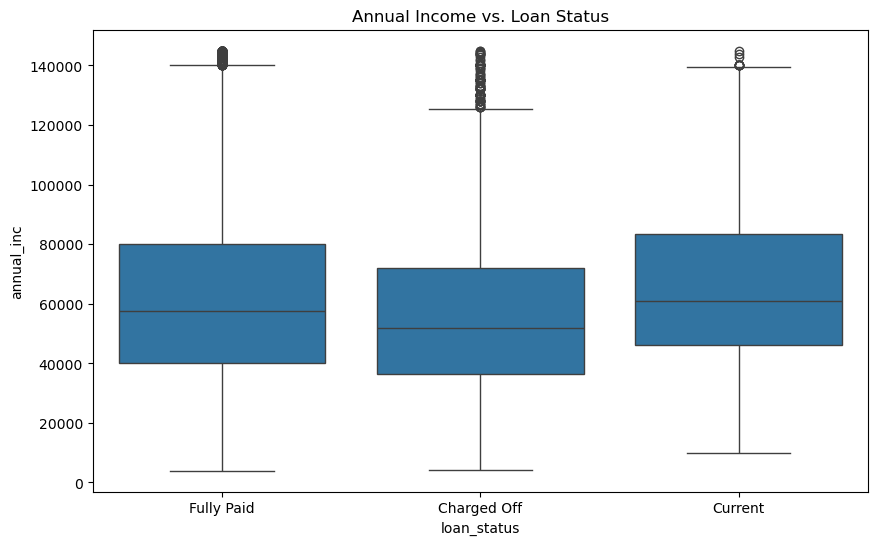

In [183]:
# 2.2 Univariate Analysis

# Remove outliers
# Method 1: Using IQR (Interquartile Range)
Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

df_no_outliers_iqr = df[(df['annual_inc'] >= lower_bound) & (df['annual_inc'] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=df_no_outliers_iqr)
plt.title("Annual Income vs. Loan Status")
plt.show()

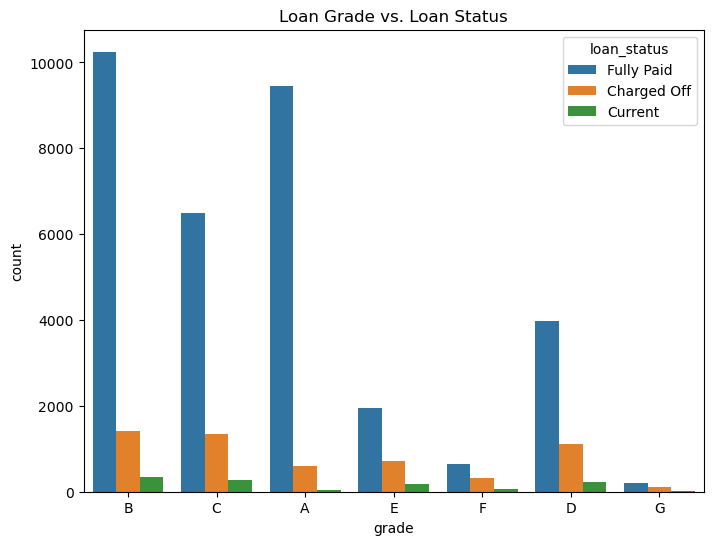

In [126]:
# 2.2.2 Categorical Variables
plt.figure(figsize=(8, 6))
sns.countplot(x='grade', hue='loan_status', data=df)
plt.title("Loan Grade vs. Loan Status")
plt.show()

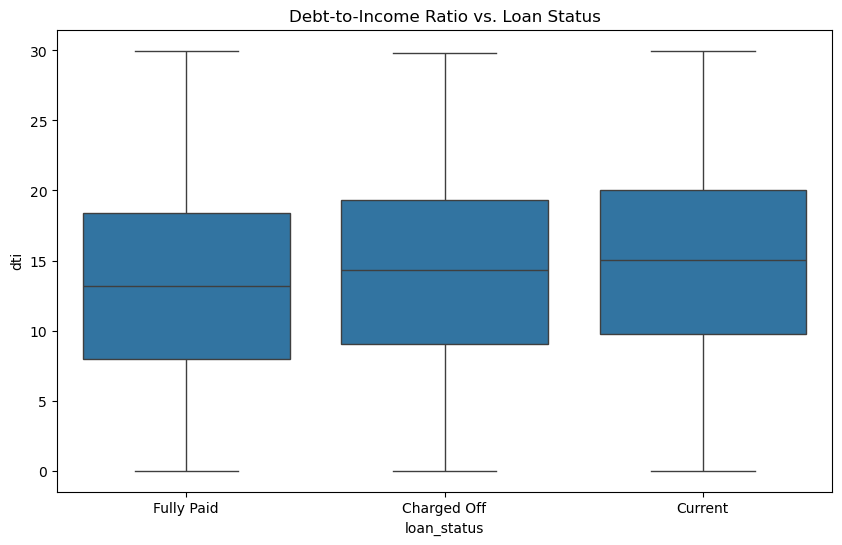

Correlation between DTI and Loan Default: -0.0417012636720239


In [188]:
# 2.3 Bivariate Analysis
# 2.3.1 Numerical vs. Categorical
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='dti', data=df)
plt.title("Debt-to-Income Ratio vs. Loan Status")
plt.show()


#Correlation: Calculate the correlation between DTI and loan default. First converting loan_status to a numerical representation 
#A positive correlation indicates that higher DTI is associated with higher default rates.

def loan_status_numeric(loan_status):
    if pd.isna(loan_status):
        return np.nan
    elif loan_status == 'Charged Off':
        return 1
    elif loan_status == 'Fully Paid':
        return 2
    elif loan_status == 'Current':
        return 3

df['loan_status_Numeric'] = df['loan_status'].apply(loan_status_numeric)
#print(df['loan_status_Numeric'])

# Calculate Correlation

correlation = df['dti'].corr(df['loan_status_numeric'])

print(f"Correlation between DTI and Loan Default: {correlation}")

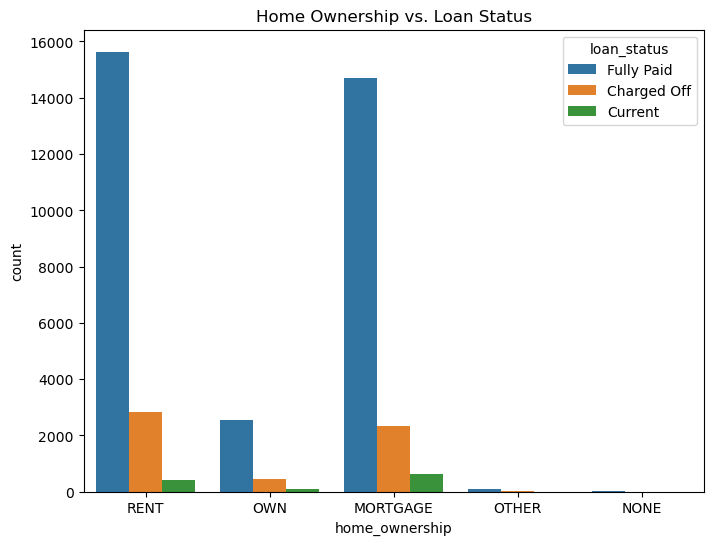

In [127]:
# 2.3.2 Categorical vs. Categorical
plt.figure(figsize=(8, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=df)
plt.title("Home Ownership vs. Loan Status")
plt.show()

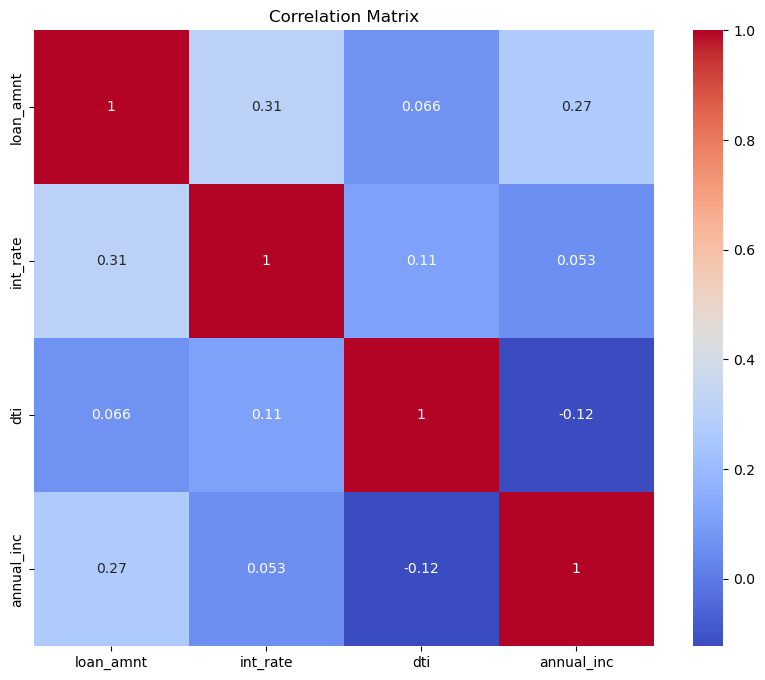

In [128]:
# 2.4 Correlation Analysis
correlation_matrix = df[['loan_amnt', 'int_rate', 'dti', 'annual_inc']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [160]:
# 4.1 Debt-to-Income Ratio

df['debt_to_income_ratio'] = df['dti'] 

count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, Length: 8, dtype: float64


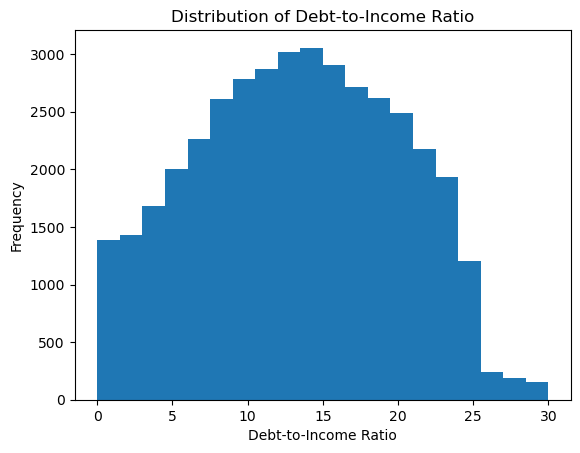

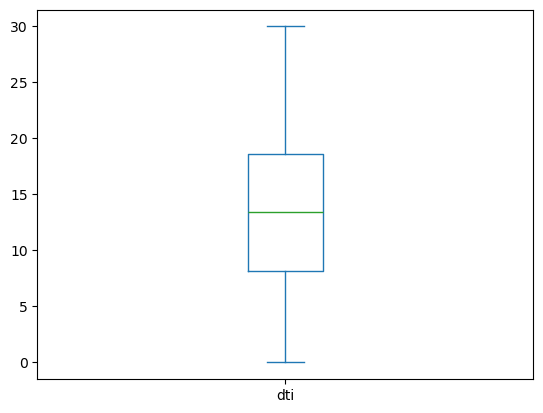

In [133]:
#Analyses with DTI:

# Examining the distribution of DTI using histograms and box plots. This helps understand the typical DTI values in our dataset and identify outliers.

#Summary Statistics: Calculating mean, median, standard deviation, quartiles, and range of DTI. This provides a concise summary of the data.

print(df['dti'].describe())
plt.hist(df['dti'], bins=20)
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Debt-to-Income Ratio')
plt.show()
df['dti'].plot(kind='box')
plt.show()

In [134]:
#Relationship with Loan Status (Default):
#Segmentation: Divide the DTI into categories (e.g., low, medium, high) and analyze the default rates within each category. 

df['dti_category'] = pd.qcut(df['dti'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4']) #Quartiles
print(df.groupby('dti_category')['loan_status'].value_counts(normalize=True))

dti_category  loan_status
Q1            Fully Paid     0.858409
              Charged Off    0.120544
              Current        0.021047
Q2            Fully Paid     0.836657
              Charged Off    0.134945
              Current        0.028399
Q3            Fully Paid     0.821719
              Charged Off    0.149723
              Current        0.028557
Q4            Fully Paid     0.801655
              Charged Off    0.161521
              Current        0.036824
Name: proportion, Length: 12, dtype: float64


C:\Users\jagdi\AppData\Local\Temp\ipykernel_17868\2893233002.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('dti_category')['loan_status'].value_counts(normalize=True))


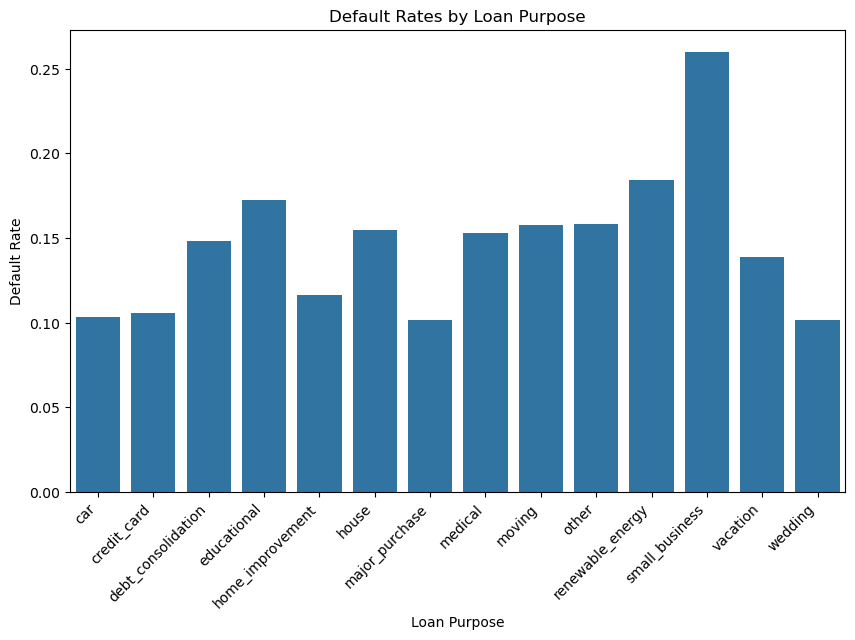

In [161]:
# Calculate default rates by purpose
default_rates = df.groupby('purpose')['loan_status'].apply(lambda x: (x == 'Charged Off').mean()).reset_index(name='default_rate')

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='purpose', y='default_rate', data=default_rates)
plt.title('Default Rates by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Default Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

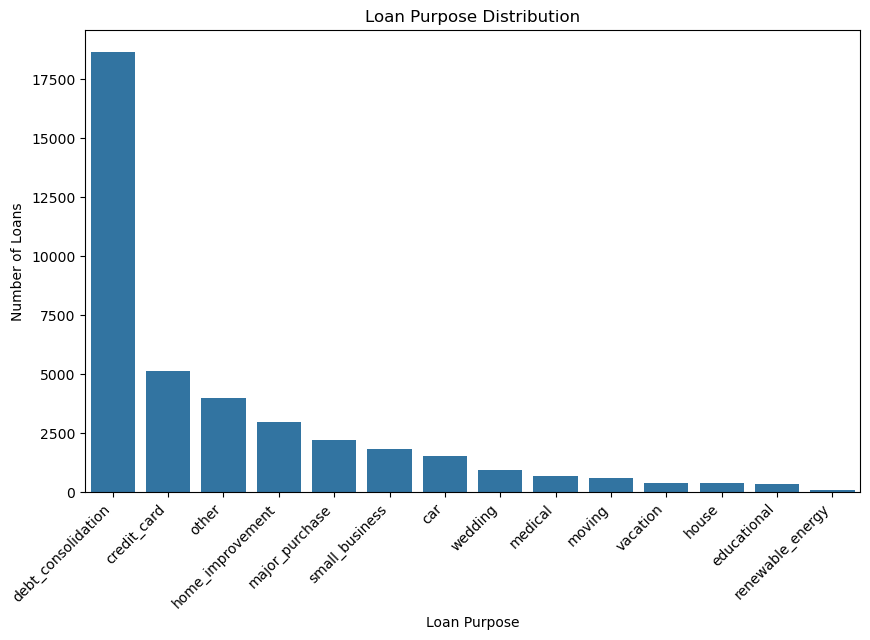

Loan Purpose Distribution:

purpose
debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: count, Length: 14, dtype: int64


In [162]:
#Loan Purpose Distribution

# Calculate the frequency distribution of loan purposes
purpose_counts = df['purpose'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=purpose_counts.index, y=purpose_counts.values)
plt.title('Loan Purpose Distribution')
plt.xlabel('Loan Purpose')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print the frequency distribution as a table
print("Loan Purpose Distribution:\n")
print(purpose_counts)